In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from scikeras.wrappers import KerasClassifier
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import joblib
import lime
import lime.lime_tabular
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read the dataset
train_inpatient_df = pd.read_csv('Train_Inpatientdata-1542865627584.csv')
train_outpatient_df = pd.read_csv('Train_Outpatientdata-1542865627584.csv')
train_beneficiary_df = pd.read_csv('Train_Beneficiarydata-1542865627584.csv')
train_1542865627584 = pd.read_csv('Train-1542865627584.csv')

In [3]:
#First 5 rows of dataset
train_inpatient_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [4]:
#First 5 rows of dataset
train_outpatient_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [5]:
#First 5 rows of dataset
train_beneficiary_df.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [6]:
#Dimension of dataset
train_beneficiary_df.shape

(138556, 25)

In [7]:
#Statistical Description of dataset
train_beneficiary_df.describe

<bound method NDFrame.describe of             BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  \
0        BENE11001  1943-01-01  NaN       1     1                     0   
1        BENE11002  1936-09-01  NaN       2     1                     0   
2        BENE11003  1936-08-01  NaN       1     1                     0   
3        BENE11004  1922-07-01  NaN       1     1                     0   
4        BENE11005  1935-09-01  NaN       1     1                     0   
...            ...         ...  ...     ...   ...                   ...   
138551  BENE159194  1939-07-01  NaN       1     1                     0   
138552  BENE159195  1938-12-01  NaN       2     1                     0   
138553  BENE159196  1916-06-01  NaN       2     1                     0   
138554  BENE159197  1930-01-01  NaN       1     1                     0   
138555  BENE159198  1952-04-01  NaN       2     1                     0   

        State  County  NoOfMonths_PartACov  NoOfMonths_PartBCov  

In [8]:
#  Combine Inpatient and Outpatient data (IP_OP)
train_ip_op_df1 = pd.concat([train_inpatient_df, train_outpatient_df], ignore_index=True)

#  Merge IP_OP with Beneficiary data
train_ip_op_bene_df = pd.merge(
    left=train_ip_op_df1, 
    right=train_beneficiary_df, 
    on='BeneID', 
    how='inner'
)

In [9]:
#  Merge the combined data with target provider labels
df = pd.merge(
    left=train_ip_op_bene_df, 
    right=train_1542865627584, 
    on='Provider', 
    how='inner'
)


In [10]:
#Dimension of dataset
df.shape

(558211, 55)

In [11]:
#Dataset columns
df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCon

In [12]:
#Checking the columns information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   AdmissionDt                      40474 non-null   object 
 10  ClmAdmitDiagnosisCode            145899 non-null  object 
 11  DeductibleAmtPaid                557312 non-null  float64
 12  Di

In [13]:
#Stastistical Description of dataset
df.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Gender,Race,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,558211.000000,557312.000000,23310.000000,5490.000000,969.000000,118.000000,9.000000,0.0,558211.000000,558211.000000,...,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000
mean,997.012133,78.421085,5896.154612,4106.358106,4221.123839,4070.262712,5269.444444,NaN,1.578838,1.255011,...,1.565193,1.294605,1.240735,1.682353,1.688829,1.898280,5227.971466,568.756807,2278.225348,649.698745
std,3821.534891,274.016812,3050.489933,2031.640878,2281.849885,2037.626990,2780.071632,NaN,0.493746,0.717437,...,0.495732,0.455866,0.427530,0.465562,0.462973,0.302279,11786.274732,1179.172616,3881.846386,1002.020811
min,0.000000,0.000000,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,40.000000,0.000000,3848.000000,2724.000000,2724.000000,2754.250000,4139.000000,NaN,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,460.000000,120.000000
50%,80.000000,0.000000,5363.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN,2.000000,1.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1170.000000,340.000000
75%,300.000000,0.000000,8669.000000,4439.000000,5185.000000,4439.000000,5185.000000,NaN,2.000000,1.000000,...,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,6000.000000,1068.000000,2590.000000,790.000000
max,125000.000000,1068.000000,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN,2.000000,5.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000


In [14]:

#Checking the null value
df.isnull().sum()

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
AdmissionDt                        517737
ClmAdmitDiagnosisCode              412312
DeductibleAmtPaid                     899
DischargeDt                        517737
DiagnosisGroupCode                 517737
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10               

In [15]:
# Removing unwanted columns
remove_unwanted_columns=['ClaimStartDt', 'ClaimEndDt', 'OperatingPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode', 
    'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 
    'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 
    'ClmDiagnosisCode_10', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
    'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'DOB', 'DOD'
]

df.drop(columns=remove_unwanted_columns, axis=1, inplace=True)

In [16]:
#Checking the dimension of dataset
df.shape

(558211, 33)

In [17]:
#Checking the null value
df.isnull().sum()

BeneID                                  0
ClaimID                                 0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OtherPhysician                     358475
DeductibleAmtPaid                     899
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes              

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   Provider                         558211 non-null  object 
 3   InscClaimAmtReimbursed           558211 non-null  int64  
 4   AttendingPhysician               556703 non-null  object 
 5   OtherPhysician                   199736 non-null  object 
 6   DeductibleAmtPaid                557312 non-null  float64
 7   ClmDiagnosisCode_1               547758 non-null  object 
 8   ClmDiagnosisCode_2               362605 non-null  object 
 9   ClmDiagnosisCode_3               243055 non-null  object 
 10  Gender                           558211 non-null  int64  
 11  Race                             558211 non-null  int64  
 12  Re

In [19]:
# Fill missing values with mean for numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing values with mode for object (categorical) columns
object_cols = df.select_dtypes(include=['object']).columns
for col in object_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   Provider                         558211 non-null  object 
 3   InscClaimAmtReimbursed           558211 non-null  int64  
 4   AttendingPhysician               558211 non-null  object 
 5   OtherPhysician                   558211 non-null  object 
 6   DeductibleAmtPaid                558211 non-null  float64
 7   ClmDiagnosisCode_1               558211 non-null  object 
 8   ClmDiagnosisCode_2               558211 non-null  object 
 9   ClmDiagnosisCode_3               558211 non-null  object 
 10  Gender                           558211 non-null  int64  
 11  Race                             558211 non-null  int64  
 12  Re

In [22]:
# Filling Nulls in Deductible Amt Paid by Patient
df['DeductibleAmtPaid'].fillna(value=0, inplace=True)

In [23]:
#Checking the null value
df.isnull().sum()

BeneID                             0
ClaimID                            0
Provider                           0
InscClaimAmtReimbursed             0
AttendingPhysician                 0
OtherPhysician                     0
DeductibleAmtPaid                  0
ClmDiagnosisCode_1                 0
ClmDiagnosisCode_2                 0
ClmDiagnosisCode_3                 0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
County                             0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
C

In [24]:
#First 5 rows of dataset
df.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OtherPhysician,DeductibleAmtPaid,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,PHY412132,1068.0,1970,4019,5853,...,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE11001,CLM66048,PRV55907,5000,PHY318495,PHY412132,1068.0,6186,2948,56400,...,1,1,2,1,1,36000,3204,60,70,No
2,BENE11001,CLM68358,PRV56046,5000,PHY372395,PHY324689,1068.0,29623,30390,71690,...,1,1,2,1,1,36000,3204,60,70,No
3,BENE11011,CLM38412,PRV52405,5000,PHY369659,PHY349768,1068.0,43491,2762,7843,...,1,2,2,1,1,5000,1068,250,320,No
4,BENE11014,CLM63689,PRV56614,10000,PHY379376,PHY412132,1068.0,042,3051,34400,...,2,1,2,2,2,21260,2136,120,100,No


In [29]:
# converting "Y"/"N" into numeric format (1/0)
df['RenalDiseaseIndicator'] = df['RenalDiseaseIndicator'].apply(lambda val: 1 if val == "Y" else 0)

In [32]:
df.dtypes

BeneID                              object
ClaimID                             object
Provider                            object
InscClaimAmtReimbursed               int64
AttendingPhysician                  object
OtherPhysician                      object
DeductibleAmtPaid                  float64
ClmDiagnosisCode_1                  object
ClmDiagnosisCode_2                  object
ClmDiagnosisCode_3                  object
Gender                               int64
Race                                 int64
RenalDiseaseIndicator                int64
State                                int64
County                               int64
NoOfMonths_PartACov                  int64
NoOfMonths_PartBCov                  int64
ChronicCond_Alzheimer                int64
ChronicCond_Heartfailure             int64
ChronicCond_KidneyDisease            int64
ChronicCond_Cancer                   int64
ChronicCond_ObstrPulmonary           int64
ChronicCond_Depression               int64
ChronicCond

In [34]:
# Binary encoding
df['Gender'] = df['Gender'].apply(lambda val: 0 if val == 2 else val)

chronic_columns = [
    'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
    'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
    'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
    'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke'
]

for col in chronic_columns:
    df[col] = df[col].apply(lambda val: 0 if val == 2 else val)

# Drop Provider to prevent leakage
df.drop(['Provider'], axis=1, inplace=True)

In [38]:
# Improved count label function for grouped bars
def add_grouped_counts(ax):
    for container in ax.containers:
        labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in container]
        ax.bar_label(container, labels=labels, label_type='edge')


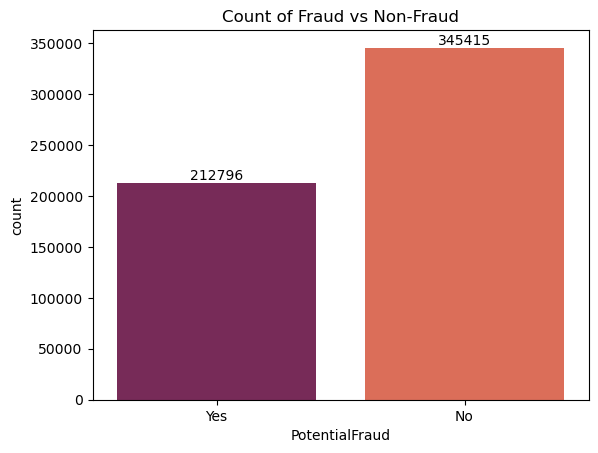

In [39]:
# Plot 1
ax = sns.countplot(x="PotentialFraud", data=df, palette='rocket')
add_grouped_counts(ax)
plt.title("Count of Fraud vs Non-Fraud")
plt.show()


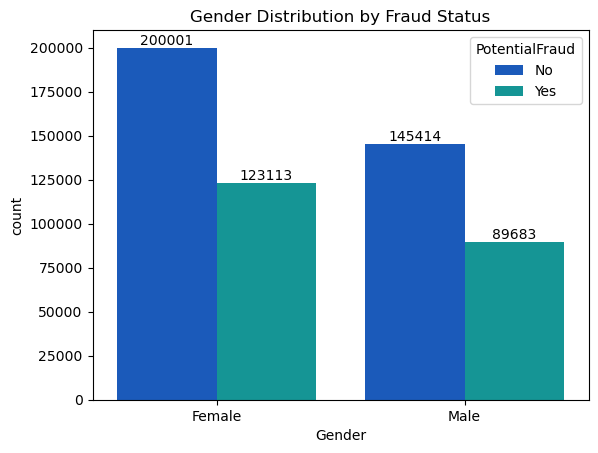

In [42]:
# Count plot for Gender
ax = sns.countplot(x="Gender", hue="PotentialFraud", data=df, palette='winter')
add_grouped_counts(ax)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.title("Gender Distribution by Fraud Status")
plt.show()

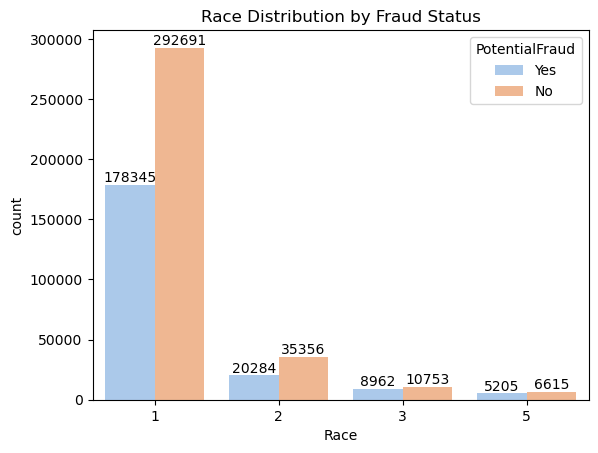

In [138]:
# Count plot for Race using potentialfraud
ax = sns.countplot(x="Race", hue="PotentialFraud", data=df, palette='pastel')
add_grouped_counts(ax)
plt.title("Race Distribution by Fraud Status")
plt.show()


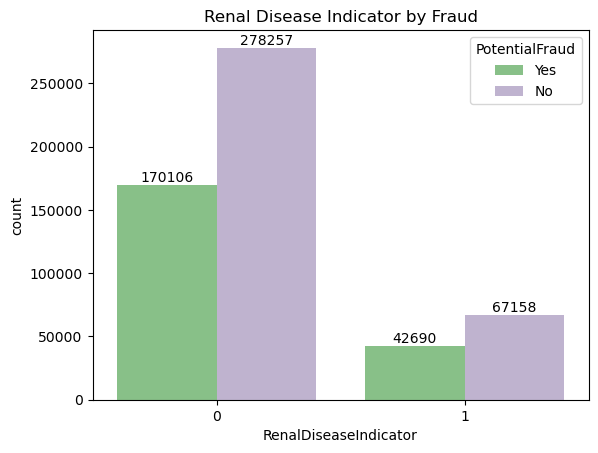

In [141]:
# Count plot for 
ax = sns.countplot(x="RenalDiseaseIndicator", hue="PotentialFraud", data=df, palette='Accent')
add_grouped_counts(ax)
plt.title("Renal Disease Indicator by Fraud")
plt.show()

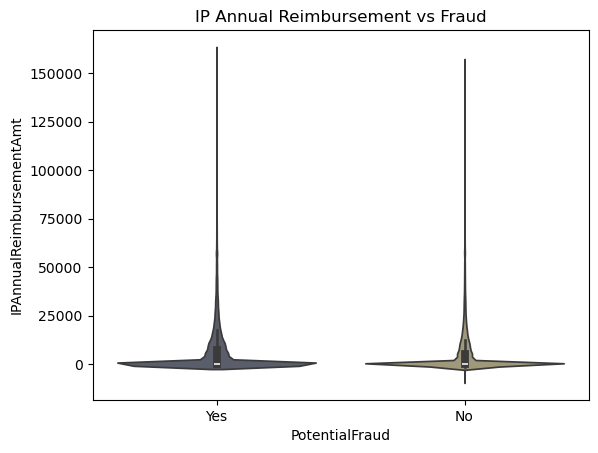

In [143]:
# Violinplot for PotentialFraud and IPAnnualReimbursementAmt
sns.violinplot(x="PotentialFraud", y="IPAnnualReimbursementAmt", data=df, palette='cividis')
plt.title("IP Annual Reimbursement vs Fraud")
plt.show()

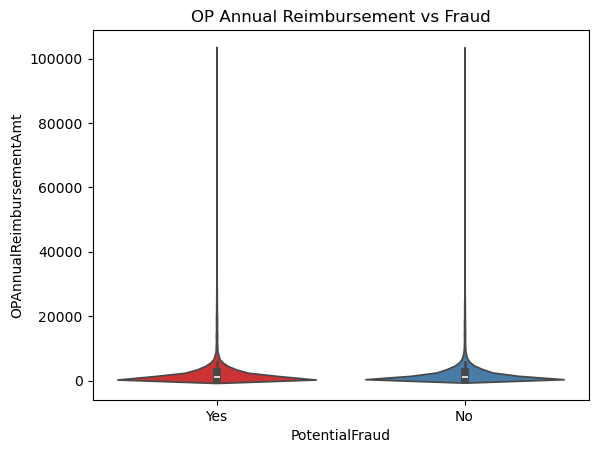

In [144]:
# Boxplot for PotentialFraud and OPAnnualReimbursementAmt
sns.violinplot(x="PotentialFraud", y="OPAnnualReimbursementAmt", data=df, palette='Set1')
plt.title("OP Annual Reimbursement vs Fraud")
plt.show()

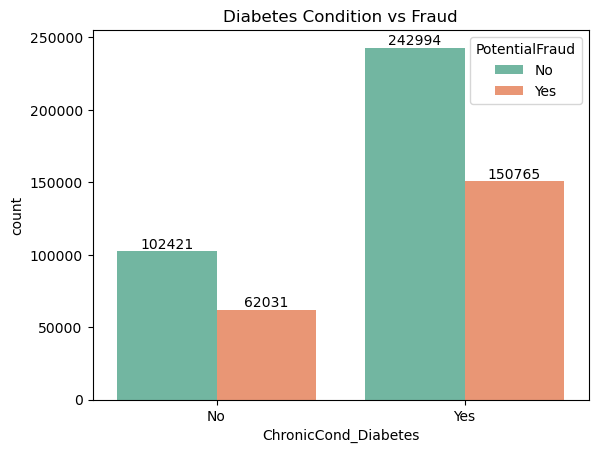

In [58]:
# Count plot for ChronicCond_Diabetes
ax = sns.countplot(x="ChronicCond_Diabetes", hue="PotentialFraud", data=df, palette='Set2')
add_grouped_counts(ax)
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.title("Diabetes Condition vs Fraud")
plt.show()

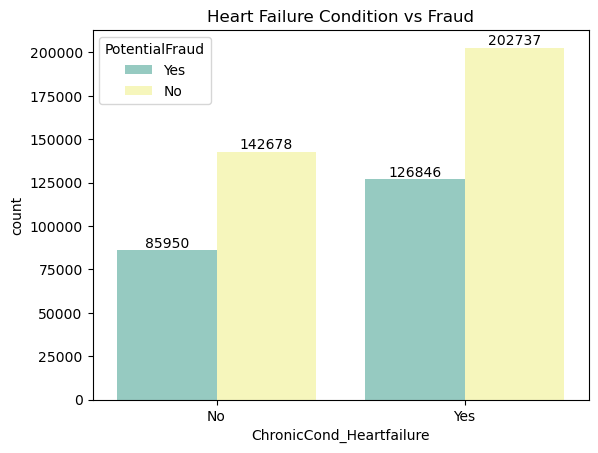

In [59]:
# Countplot for ChronicCond_Heartfailure
ax = sns.countplot(x="ChronicCond_Heartfailure", hue="PotentialFraud", data=df, palette='Set3')
add_grouped_counts(ax)
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.title("Heart Failure Condition vs Fraud")
plt.show()

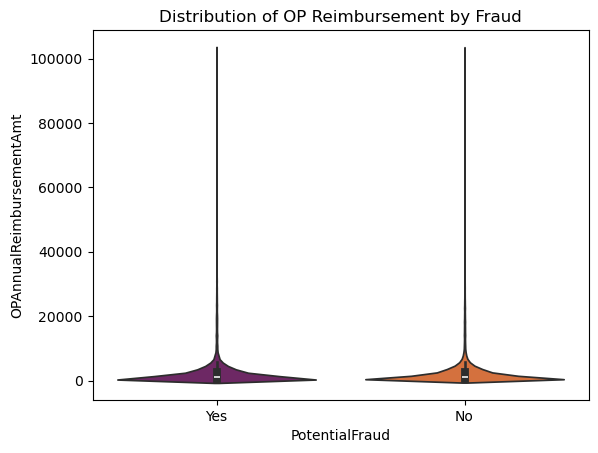

In [61]:
# Violinplot for PotentialFraud and OPAnnualReimbursementAmt
sns.violinplot(x="PotentialFraud", y="OPAnnualReimbursementAmt", data=df, palette='inferno')
plt.title("Distribution of OP Reimbursement by Fraud")
plt.show()

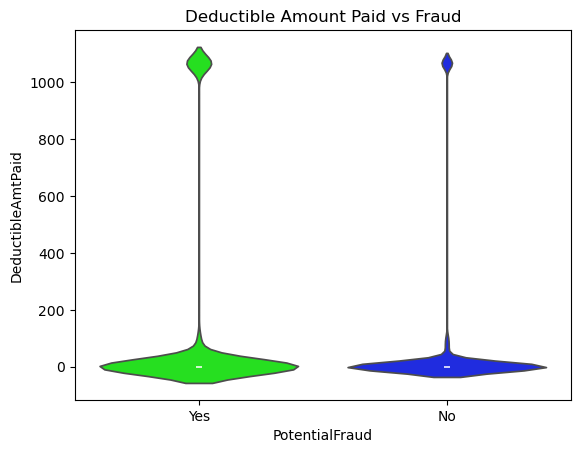

In [62]:
# Violin plot for PotentialFraud and DeductibleAmtPaid
sns.violinplot(x="PotentialFraud", y="DeductibleAmtPaid", data=df, palette = 'hsv')
plt.title("Deductible Amount Paid vs Fraud")
plt.show()

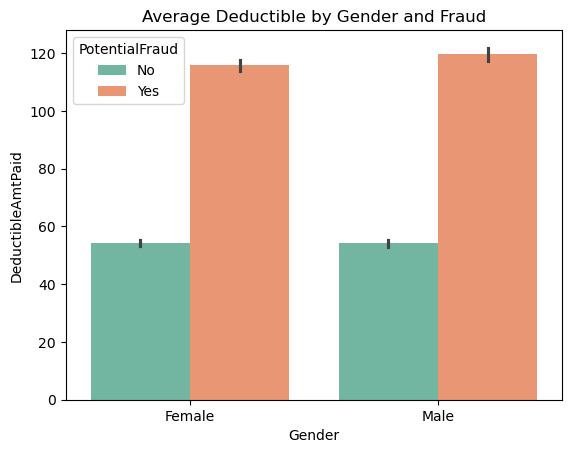

In [63]:
# Barplot for Gender and DeductibleAmtPaid
sns.barplot(x="Gender", y="DeductibleAmtPaid", hue="PotentialFraud", data=df, palette='Set2')
add_grouped_counts(ax)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.title("Average Deductible by Gender and Fraud")
plt.show()

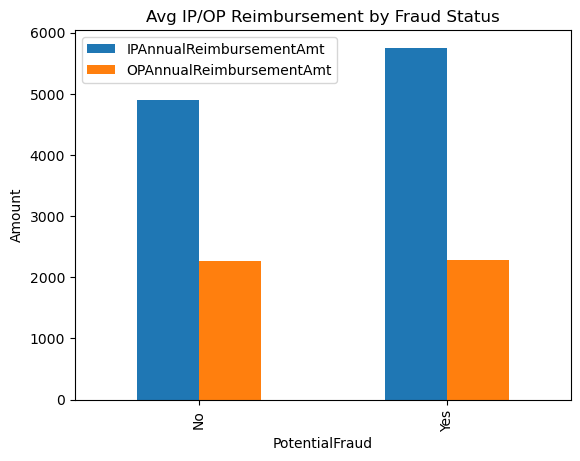

In [65]:
# Barplot 
df.groupby("PotentialFraud")[["IPAnnualReimbursementAmt", "OPAnnualReimbursementAmt"]].mean().plot(kind='bar')
plt.title("Avg IP/OP Reimbursement by Fraud Status")
plt.ylabel("Amount")
plt.xlabel("PotentialFraud")
plt.show()

In [59]:
# Encode target variable
df['PotentialFraud'] = df['PotentialFraud'].map({'Yes': 1, 'No': 0})

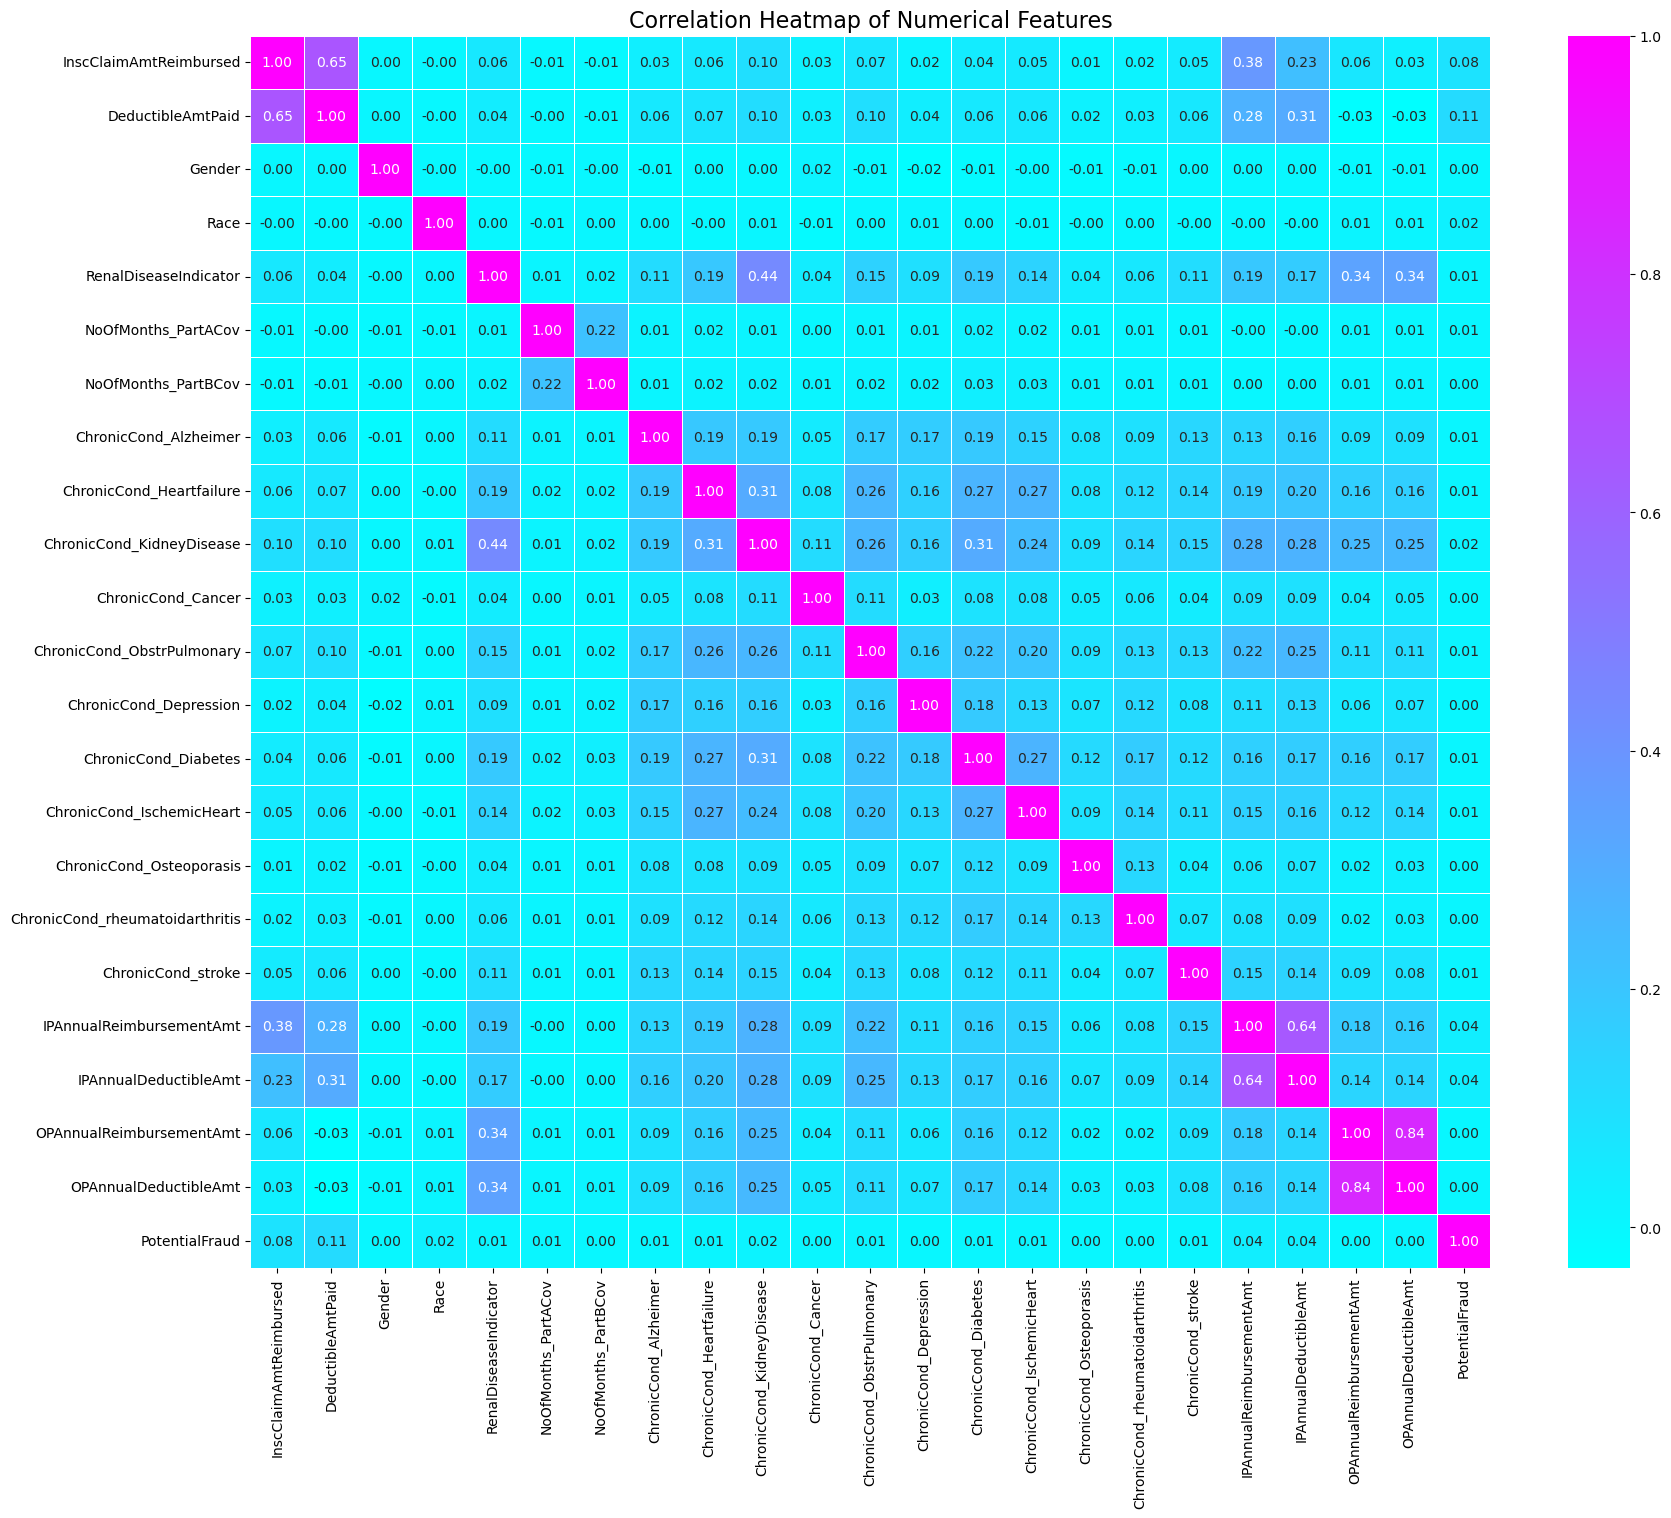

In [38]:
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="cool", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 32 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   InscClaimAmtReimbursed           558211 non-null  int64  
 3   AttendingPhysician               558211 non-null  object 
 4   OtherPhysician                   558211 non-null  object 
 5   DeductibleAmtPaid                558211 non-null  float64
 6   ClmDiagnosisCode_1               558211 non-null  object 
 7   ClmDiagnosisCode_2               558211 non-null  object 
 8   ClmDiagnosisCode_3               558211 non-null  object 
 9   Gender                           558211 non-null  int64  
 10  Race                             558211 non-null  int64  
 11  RenalDiseaseIndicator            558211 non-null  int64  
 12  St

In [61]:
from sklearn.preprocessing import LabelEncoder

le_bene = LabelEncoder()
df['BeneID'] = le_bene.fit_transform(df['BeneID'])

le_claim = LabelEncoder()
df['ClaimID'] = le_claim.fit_transform(df['ClaimID'])

le_attending = LabelEncoder()
df['AttendingPhysician'] = le_attending.fit_transform(df['AttendingPhysician'])

le_other = LabelEncoder()
df['OtherPhysician'] = le_other.fit_transform(df['OtherPhysician'])

le_diag1 = LabelEncoder()
df['ClmDiagnosisCode_1'] = le_diag1.fit_transform(df['ClmDiagnosisCode_1'])

le_diag2 = LabelEncoder()
df['ClmDiagnosisCode_2'] = le_diag2.fit_transform(df['ClmDiagnosisCode_2'])

le_diag3 = LabelEncoder()
df['ClmDiagnosisCode_3'] = le_diag3.fit_transform(df['ClmDiagnosisCode_3'])


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 32 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  int32  
 1   ClaimID                          558211 non-null  int32  
 2   InscClaimAmtReimbursed           558211 non-null  int64  
 3   AttendingPhysician               558211 non-null  int32  
 4   OtherPhysician                   558211 non-null  int32  
 5   DeductibleAmtPaid                558211 non-null  float64
 6   ClmDiagnosisCode_1               558211 non-null  int32  
 7   ClmDiagnosisCode_2               558211 non-null  int32  
 8   ClmDiagnosisCode_3               558211 non-null  int32  
 9   Gender                           558211 non-null  int64  
 10  Race                             558211 non-null  int64  
 11  RenalDiseaseIndicator            558211 non-null  int64  
 12  St

In [65]:
#  Separate Dependent and Independent Variables
X = df.drop('PotentialFraud', axis=1)
y = df['PotentialFraud']

In [67]:
X.columns

Index(['BeneID', 'ClaimID', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OtherPhysician', 'DeductibleAmtPaid', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt'],
      dtype='object')

In [69]:
#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [71]:
#  Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


  File "C:\Users\user\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\user\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [72]:
y_train.value_counts()

PotentialFraud
0    241937
1    241937
Name: count, dtype: int64

In [73]:
#  Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
subset_size = 20000
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

In [79]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           scoring='f1',
                           n_jobs=-1,
                           verbose=1)

start_time = time.time()
grid_search.fit(X_train_subset, y_train_subset)
best_rf = grid_search.best_estimator_
end_time = time.time()
execution_time = end_time - start_time

#  Make Predictions
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

#  Evaluation Metrics
acc_1 = accuracy_score(y_test, y_pred)
prec_1 = precision_score(y_test, y_pred)
rec_1 = recall_score(y_test, y_pred)
f1_1 = f1_score(y_test, y_pred)
roc_auc_1 = roc_auc_score(y_test, y_proba)
cm_1 = confusion_matrix(y_test, y_pred)

print(" Model Evaluation")
print(f"Accuracy       : {acc_1:.4f}")
print(f"Precision      : {prec_1:.4f}")
print(f"Recall         : {rec_1:.4f}")
print(f"F1 Score       : {f1_1:.4f}")
print(f"ROC-AUC Score  : {roc_auc_1:.4f}")
print(f"Execution Time : {execution_time:.2f} seconds\n")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
 Model Evaluation
Accuracy       : 0.6833
Precision      : 0.6966
Recall         : 0.3033
F1 Score       : 0.4226
ROC-AUC Score  : 0.7189
Execution Time : 33.69 seconds



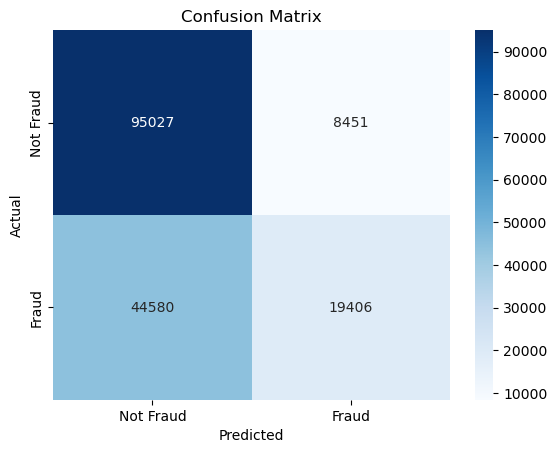

In [81]:
# Confusion Matrix Visualization
sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

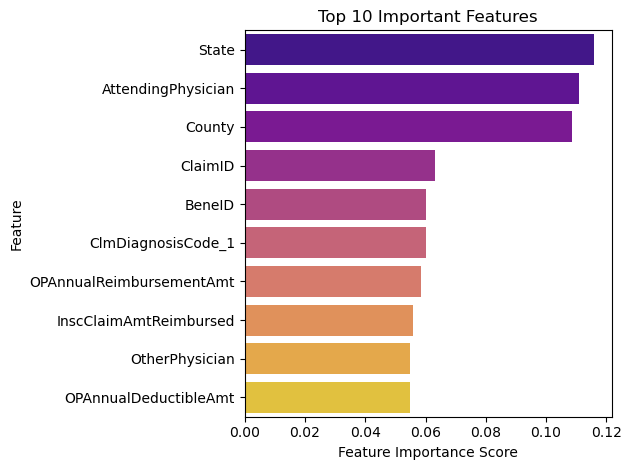

In [83]:
#  Feature Importance
importances = best_rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importances
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='plasma')
plt.title('Top 10 Important Features')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [85]:
# Hyperparameter Tuning using GridSearchCV
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.01]
}

xgb_grid_search = GridSearchCV(estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                               param_grid=xgb_param_grid,
                               cv=3,
                               scoring='f1',
                               n_jobs=-1,
                               verbose=1)

start_time = time.time()
xgb_grid_search.fit(X_train, y_train)
best_xgb = xgb_grid_search.best_estimator_
end_time = time.time()
xgb_execution_time = end_time - start_time

# Make Predictions
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Evaluation Metrics
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Results
print("XGBoost Model Evaluation")
print(f"Accuracy       : {acc_xgb:.4f}")
print(f"Precision      : {prec_xgb:.4f}")
print(f"Recall         : {rec_xgb:.4f}")
print(f"F1 Score       : {f1_xgb:.4f}")
print(f"ROC-AUC Score  : {roc_auc_xgb:.4f}")
print(f"Execution Time : {xgb_execution_time:.2f} seconds\n")


Fitting 3 folds for each of 8 candidates, totalling 24 fits
XGBoost Model Evaluation
Accuracy       : 0.7473
Precision      : 0.6964
Recall         : 0.6003
F1 Score       : 0.6448
ROC-AUC Score  : 0.7979
Execution Time : 37.49 seconds



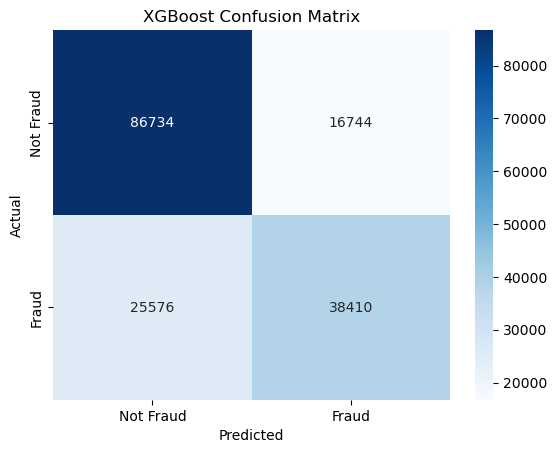

In [86]:
# Confusion Matrix
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [87]:
#  Logistic Regression with GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  
}

grid = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)

start_time = time.time()
grid.fit(X_train, y_train)
best_logreg = grid.best_estimator_
end_time = time.time()
exec_time = end_time - start_time

#  Predictions
y_pred = best_logreg.predict(X_test)
y_proba = best_logreg.predict_proba(X_test)[:, 1]

#  Evaluation Metrics
acc_2 = accuracy_score(y_test, y_pred)
prec_2 = precision_score(y_test, y_pred)
rec_2 = recall_score(y_test, y_pred)
f1_2 = f1_score(y_test, y_pred)
roc_auc_2 = roc_auc_score(y_test, y_proba)

print(" Logistic Regression Evaluation")
print(f"Accuracy       : {acc_2:.4f}")
print(f"Precision      : {prec_2:.4f}")
print(f"Recall         : {rec_2:.4f}")
print(f"F1 Score       : {f1_2:.4f}")
print(f"ROC-AUC Score  : {roc_auc_2:.4f}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits
 Logistic Regression Evaluation
Accuracy       : 0.5405
Precision      : 0.4065
Recall         : 0.4404
F1 Score       : 0.4228
ROC-AUC Score  : 0.5328


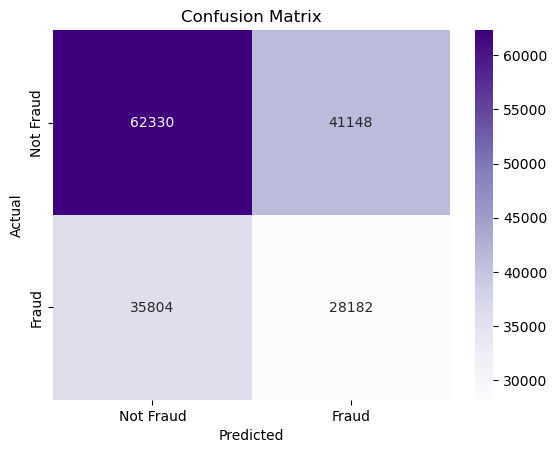

In [88]:
#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [89]:
# Define SVM parameter grid
svm_param_grid = {
    'C': [1, 10]
}

# GridSearchCV on the subset
svm_grid_search = GridSearchCV(estimator=SVC(probability=True, random_state=42),
                               param_grid=svm_param_grid,
                               cv=3,
                               scoring='f1',
                               n_jobs=-1,
                               verbose=1)

# Train SVM on subset
start_time = time.time()
svm_grid_search.fit(X_train_subset, y_train_subset)
best_svm = svm_grid_search.best_estimator_
end_time = time.time()
svm_execution_time = end_time - start_time

# Predictions on full test set
y_pred_svm = best_svm.predict(X_test)
y_proba_svm = best_svm.predict_proba(X_test)[:, 1]

# Evaluation
acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
rec_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Results
print("SVM Model Evaluation (Subset Training)")
print(f"Accuracy       : {acc_svm:.4f}")
print(f"Precision      : {prec_svm:.4f}")
print(f"Recall         : {rec_svm:.4f}")
print(f"F1 Score       : {f1_svm:.4f}")
print(f"ROC-AUC Score  : {roc_auc_svm:.4f}")
print(f"Execution Time : {svm_execution_time:.2f} seconds\n")

Fitting 3 folds for each of 2 candidates, totalling 6 fits
SVM Model Evaluation (Subset Training)
Accuracy       : 0.6020
Precision      : 0.4618
Recall         : 0.2518
F1 Score       : 0.3259
ROC-AUC Score  : 0.5565
Execution Time : 367.21 seconds



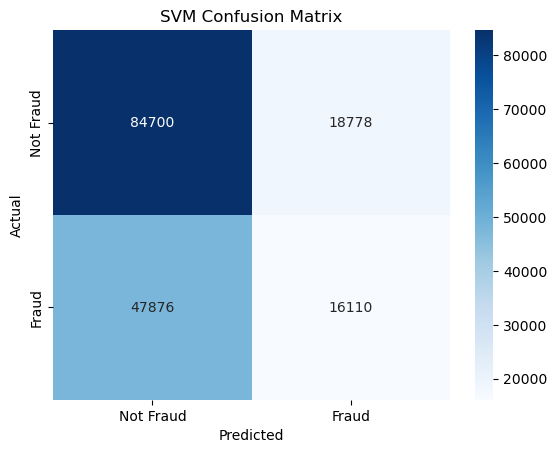

In [90]:
# Confusion Matrix
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [91]:
subset_size = 300000
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

In [92]:
# Build DNN function
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from scikeras.wrappers import KerasClassifier
from sklearn.pipeline import Pipeline

def build_model(hidden_layer_1=256, hidden_layer_2=128, hidden_layer_3=64, dropout_rate=0.3, learning_rate=0.0005):
    model = Sequential([
        Dense(hidden_layer_1, kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),
        Dropout(dropout_rate),

        Dense(hidden_layer_2, kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),
        Dropout(dropout_rate),

        Dense(hidden_layer_3, kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        LeakyReLU(alpha=0.01),
        Dropout(dropout_rate),

        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# SciKeras wrapper
dnn_clf = KerasClassifier(model=build_model, verbose=0)

# Pipeline with scaling
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', dnn_clf)
])

# GridSearchCV parameters
param_grid = {
    'classifier__batch_size': [128],
    'classifier__epochs': [30]
}

# Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Training
start_time = time.time()
grid_search.fit(X_train_subset, y_train_subset)
end_time = time.time()
dnn_execution_time = end_time - start_time

# Best Model
best_dnn = grid_search.best_estimator_

# Predictions
y_pred_dnn = best_dnn.predict(X_test)
y_proba_dnn = best_dnn.predict_proba(X_test)[:, 1]

# Evaluation
acc_dnn = accuracy_score(y_test, y_pred_dnn)
prec_dnn = precision_score(y_test, y_pred_dnn)
rec_dnn = recall_score(y_test, y_pred_dnn)
f1_dnn = f1_score(y_test, y_pred_dnn)
roc_auc_dnn = roc_auc_score(y_test, y_proba_dnn)
cm_dnn = confusion_matrix(y_test, y_pred_dnn)

# Results
print("DNN Model Evaluation with GridSearchCV")
print(f"Accuracy       : {acc_dnn:.4f}")
print(f"Precision      : {prec_dnn:.4f}")
print(f"Recall         : {rec_dnn:.4f}")
print(f"F1 Score       : {f1_dnn:.4f}")
print(f"ROC-AUC Score  : {roc_auc_dnn:.4f}")
print(f"Execution Time : {dnn_execution_time:.2f} seconds\n")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
DNN Model Evaluation with GridSearchCV
Accuracy       : 0.6483
Precision      : 0.6014
Recall         : 0.2355
F1 Score       : 0.3385
ROC-AUC Score  : 0.6354
Execution Time : 385.32 seconds



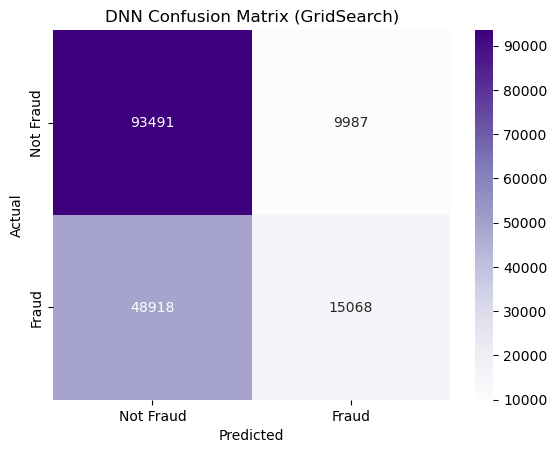

In [93]:
# Confusion Matrix
sns.heatmap(cm_dnn, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('DNN Confusion Matrix (GridSearch)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [103]:
#  comparison data using metric variables
data = {
    "Model": ["Random Forest", "XGBoost", "Logistic Regression", "SVC", "DNN"],
    "Accuracy": [acc_1, acc_xgb, acc_2, acc_svm, acc_dnn],
    "Precision": [prec_1, prec_xgb, prec_2, prec_svm, prec_dnn],
    "Recall": [rec_1, rec_xgb, rec_2, rec_svm, rec_dnn],
    "F1-Score": [f1_1, f1_xgb, f1_2, f1_svm, f1_dnn],
    "ROC-AUC": [roc_auc_1, roc_auc_xgb, roc_auc_2, roc_auc_svm, roc_auc_dnn]
}

# Create the comparison table
comparison_table = pd.DataFrame(data)

# Display the table
print(comparison_table)


                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0        Random Forest  0.683329   0.696629  0.303285  0.422591  0.718871
1              XGBoost  0.747289   0.696414  0.600288  0.644788  0.797861
2  Logistic Regression  0.540486   0.406491  0.440440  0.422785  0.532848
3                  SVC  0.601980   0.461763  0.251774  0.325869  0.556515
4                  DNN  0.648253   0.601397  0.235489  0.338451  0.635410


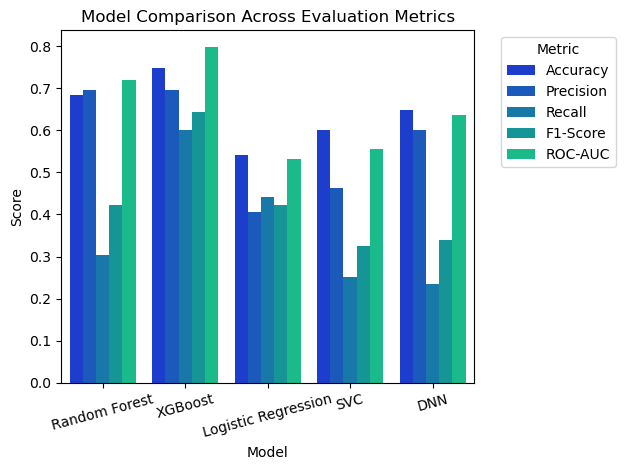

In [105]:
# Melt for grouped bar chart
df_melted = comparison_table.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Plot
sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric", palette='winter')
plt.title("Model Comparison Across Evaluation Metrics")
plt.ylabel("Score")
plt.xticks(rotation=15)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [63]:
# Select only 4 features
df = df.sample(n=20000, random_state=42)  # take 20k rows
selected_features = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'ChronicCond_Diabetes', 'ChronicCond_Heartfailure']
X = df[selected_features]
y = df['PotentialFraud']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
joblib.dump(rf_model, "rf_model_retrained.pkl")

#  Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
joblib.dump(logistic_model, "logistic_model_retrained.pkl")

#  XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
joblib.dump(xgb_model, "xgb_model_retrained.pkl")

#  Support Vector Machine
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
joblib.dump(svm_model, "svm_model_retrained.pkl")

# Deep Neural Network
def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(4,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

dnn_clf = KerasClassifier(model=build_model, epochs=30, batch_size=128, verbose=0)

# Create pipeline for DNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', dnn_clf)
])

pipeline.fit(X_train, y_train)
joblib.dump(pipeline, "dnn_pipeline_model_retrained.pkl")


['dnn_pipeline_model_retrained.pkl']

In [65]:
# Save pipeline components
scaler = pipeline.named_steps['scaler']
joblib.dump(scaler, "scaler.pkl")

dnn_model = pipeline.named_steps['classifier'].model_
dnn_model.save("dnn_model_retrained.h5")
